In [ ]:
Same Medical data we will try to analyse with 2 different approaches here:
    1. Without Scaling the dataset
    2. Using Min-Max Scaling

In [22]:
#importing all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#importing dataset
dataSet = pd.read_csv("Dataset_spine.csv")

Basic data sanity and exploratory data analysis is already done in other sheet. So will skip this step here.

## Data Preprocessing

In [24]:
# Deleting 13th column
del dataSet['Unnamed: 13']
#Naming all the columns
dataSet.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

In [25]:
#changing the string value to numerical for status column
dataSet.loc[dataSet['Status'] == 'Abnormal','Status'] = 1
dataSet.loc[dataSet['Status'] == 'Normal','Status'] = 0

In [26]:
#get the x and y variable from dataset
X = dataSet.loc[:,dataSet.columns != 'Status']
y = dataSet.loc[:,dataSet.columns == 'Status']

In [27]:
# Importing libraries related to preprocessing:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [28]:
def data_preprocess_withoutScaling(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)  
    # convert the y-variable data type to int :
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    return(X_train, X_test, y_train, y_test)


In [29]:
def data_preprocess_withMinMaxScaling(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)  
    scaler = MinMaxScaler()

    scaler.fit(X_train)

    # Now apply the transformations to the data:
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    
    # convert the y-variable data type to int :
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    return(train_scaled, test_scaled, y_train, y_test)


In [30]:
# X_train_withoutscal, X_test_withoutscal, y_train, y_test = data_preprocess_withoutScaling(X,y)
X_train_mimmaxscaled, X_test_minmaxscaled, y_train, y_test = data_preprocess_withMinMaxScaling(X,y)

## Building the Model

In [31]:
#importing required libraries
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [32]:
def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x, y)
    return(logreg)

### No Scalling - Model 1

In [15]:
logreg_result_withoutscale = logistic_regression(X_train_withoutscal, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
#print the train - test scores
print("Training score : {:.2f}".format(logreg_result_withoutscale.score(X_train_withoutscal,y_train)))
print("Testing score : {:.2f}".format(logreg_result_withoutscale.score(X_test_withoutscal,y_test)))

Training score : 0.87
Testing score : 0.80


In [20]:
sm.Logit(y_train,X_train_withoutscal).fit().summary2()

         Current function value: 0.298731
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                  Logit              Pseudo R-squared:   0.525     
Dependent Variable:     y                  AIC:                153.6491  
Date:                   2021-04-03 10:26   BIC:                194.2079  
No. Observations:       217                Log-Likelihood:     -64.825   
Df Model:               11                 LL-Null:            -136.45   
Df Residuals:           205                LLR p-value:        3.5513e-25
Converged:              0.0000             Scale:              1.0000    
No. Iterations:         35.0000                                          
-------------------------------------------------------------------------
                          Coef.   Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
pelvic_incidence          12.8611      nan     nan    nan     nan     nan
pelvic tilt              -12.7440      nan     nan    nan     nan     nan
lumbar_lordosis_angle     -0.0513   0.0286 -1.7897 0.0735 -0.1074  0.0049
sacral_slope             -12.8725      nan     nan    nan     nan     nan
pelvic_radius             -0.0231   0.0117 -1.9647 0.0494 -0.0461 -0.0001
degree_spondylolisthesis   0.1859   0.0320  5.8080 0.0000  0.1232  0.2487
pelvic_slope               0.2282   0.8277  0.2757 0.7828 -1.3941  1.8505
Direct_tilt               -0.0096   0.0280 -0.3417 0.7326 -0.0645  0.0453
thoracic_slope             0.0518   0.0715  0.7241 0.4690 -0.0883  0.1919
cervical_tilt              0.2089   0.0820  2.5488 0.0108  0.0483  0.3696
sacrum_angle              -0.0072   0.0188 -0.3833 0.7015 -0.0440  0.0296
scoliosis_slope           -0.0265   0.0223 -1.1877 0.2350 -0.0702  0.0172
=========================================================================

"""

without scaling it is giving warning and asking for scaling the dataset.

### Min-Max Scalling - Model 2

In [33]:
logreg_result_withmimmaxscale = logistic_regression(X_train_mimmaxscaled, y_train)

In [34]:
#print the train - test scores
print("Training score : {:.2f}".format(logreg_result_withmimmaxscale.score(X_train_mimmaxscaled,y_train)))
print("Testing score : {:.2f}".format(logreg_result_withmimmaxscale.score(X_test_minmaxscaled,y_test)))

Training score : 0.76
Testing score : 0.73


In [36]:
sm.Logit(y_train,X_train_mimmaxscaled).fit().summary2()

Optimization terminated successfully.
         Current function value: 0.249223
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.604     
Dependent Variable: y                AIC:              132.1630  
Date:               2021-04-03 12:58 BIC:              172.7217  
No. Observations:   217              Log-Likelihood:   -54.081   
Df Model:           11               LL-Null:          -136.45   
Df Residuals:       205              LLR p-value:      1.4262e-29
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
        Coef.     Std.Err.      z      P>|z|     [0.025     0.975] 
-------------------------------------------------------------------
x1     -21.0871    10.0725   -2.0935   0.0363   -40.8287    -1.3454
x2      15.2298     4.6724    3.2596   0.0011     6.0722    24.3874
x3      -5.3262     3.5753   -1.4897   0.1363   -12.3336     1.6812
x4      14.6766     9.9900    1.4691   0.1418    -4.9035    34.2566
x5     -10.8122     2.7742   -3.8975   0.0001   -16.2495    -5.3749
x6      88.0711    14.9869    5.8765   0.0000    58.6972   117.4449
x7      -0.1943     0.9540   -0.2037   0.8386    -2.0642     1.6755
x8      -0.9588     1.0131   -0.9464   0.3439    -2.9445     1.0268
x9      -0.0087     1.0044   -0.0087   0.9931    -1.9773     1.9598
x10      1.2979     0.9060    1.4325   0.1520    -0.4779     3.0737
x11      0.2071     0.8909    0.2325   0.8162    -1.5391     1.9533
x12     -1.5119     0.9294   -1.6268   0.1038    -3.3334     0.3096
=================================================================

"""

In [ ]:
Observation:
    Not very high stardad deviation. 
    Model has converged well in 10 iterations
    Based on P value will take the significant variables at 95% of confidence: x1, x2, x5, x6

### Min-Max Scaling - Model 3

In [46]:
# considering only the variables which have p-value less than 0.05
X = dataSet.loc[:,dataSet.columns != 'Status']
y = dataSet.loc[:,dataSet.columns == 'Status']
X_trim_1 = X.loc[:,['pelvic_incidence', 'pelvic tilt','pelvic_radius','degree_spondylolisthesis']]

In [49]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess_withMinMaxScaling(X_trim_1,y)

logreg_result = logistic_regression(X_train_mimmaxscaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.742
Test set score: 0.753


In [50]:
logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.268989
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.572     
Dependent Variable: y                AIC:              124.7413  
Date:               2021-04-03 14:13 BIC:              138.2609  
No. Observations:   217              Log-Likelihood:   -58.371   
Df Model:           3                LL-Null:          -136.45   
Df Residuals:       213              LLR p-value:      1.2368e-33
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
        Coef.     Std.Err.      z      P>|z|     [0.025     0.975] 
-------------------------------------------------------------------
x1     -11.7024     2.8543   -4.0999   0.0000   -17.2967    -6.1081
x2      11.2496     2.4347    4.6205   0.0000     6.4776 

In [52]:
import numpy as np
# assigning the model predicted values to y_pred
y_pred = logreg_result.predict(X_test_scaled)

# assigning the string Normal and Abnormal to the 0 and 1 values respectively. This is useful in plotting 
# the confusion matrix
y_pred_string = y_pred.astype(str)
y_pred_string[np.where(y_pred_string == '0')] = 'Normal'
y_pred_string[np.where(y_pred_string == '1')] = 'Abnormal'

y_test_string = y_test.astype(str)
y_test_string[np.where(y_test_string == '0')] = 'Normal'
y_test_string[np.where(y_test_string == '1')] = 'Abnormal'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=['Abnormal', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


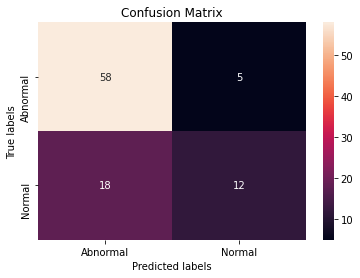

In [53]:
# Gauging model accuracy

from sklearn.metrics import confusion_matrix
ax= plt.subplot()
labels = ['Abnormal','Normal']
cm = confusion_matrix(y_test_string, y_pred_string, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Abnormal', 'Normal']); ax.yaxis.set_ticklabels(['Abnormal', 'Normal']);
plt.show()